In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
from astropy.io import fits
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import warnings
from imageio import imsave
get_ipython().run_line_magic('matplotlib', 'inline')
from skimage import data
from skimage.transform import resize
import math

warnings.filterwarnings('ignore')

In [2]:
# He fits 파일 있는 폴더 경로 설정

file_list = os.listdir('/content/drive/My Drive/he_2011_1hr_real') # he_data 파일 만들고 안에 1시간 간격 he fits 데이터 넣어놓기
file_list.sort() # 왜인지는 모르겠지만 file_list가 순서대로 정렬이 안 되어있어서 이걸로 정렬을 해줘야한다
file_list = ['/content/drive/My Drive/he_2011_1hr_real//' + item for item in file_list]

In [ ]:
# 1. He를 numpy array로 읽고, 노출 시간으로 나눠준 후, 태양 내부에만 해당하는 픽셀값 골라서, 그 중 min max median, 그리고 datetime 구하기 (그래프 그리기 위해)

isize = 1024 # He 파일의 크기
X = np.arange(isize)[:, None]
Y = np.arange(isize)[None :]
XY = np.sqrt((X-isize/2.)**2. + (Y-isize/2.)**2.)

def run(i):
    file = fits.open(file_list[i]) # 메모리 문제 때문에 다시 닫기 위해서 close 기능 있는 astropy로 파일 읽기 (sunpy는 read)
    header = file[0].header
    exptime = header['EXPDUR']
    data = file[0].data / exptime
    file.close()
    rsun = header['CRRADIUS']
    Z = np.where(XY < rsun) # data[Z] = 설정해놓은 rsun에 해당하는 데이터의 np.array를 뽑아냄
    he_max = np.max(data[Z])
    he_min = np.min(data[Z])
    he_median = np.median(data[Z])
    
    date = header['DATE-OBS']
    time = header['TIME-OBS']
    
    # he 데이터는 굳이 median 값 통일 X, 나중에 모델 돌린 후 상황보고 하기

    return (he_max, he_min, he_median, date, time) # 튜플 형식

# 태양 내부 픽셀값들 중 max, min, median, 그리고 date, time 값들을 모아놓은 리스트 만들기

max_list = []
min_list = []
median_list = []

date_list = []
time_list = []

for i in range(0,len(file_list)):
    max_list.append(run(i)[0])
    min_list.append(run(i)[1])
    median_list.append(run(i)[2])
    date_list.append(run(i)[3])
    time_list.append(run(i)[4])
    print(i+1)
    
# 그래프의 x축이 될 시간들의 집합인 리스트 만들기     
    
datetime_list = []    
    
for i in range(len(date_list)):
    datetime_list.append(date_list[i] + ' ' + time_list[i])

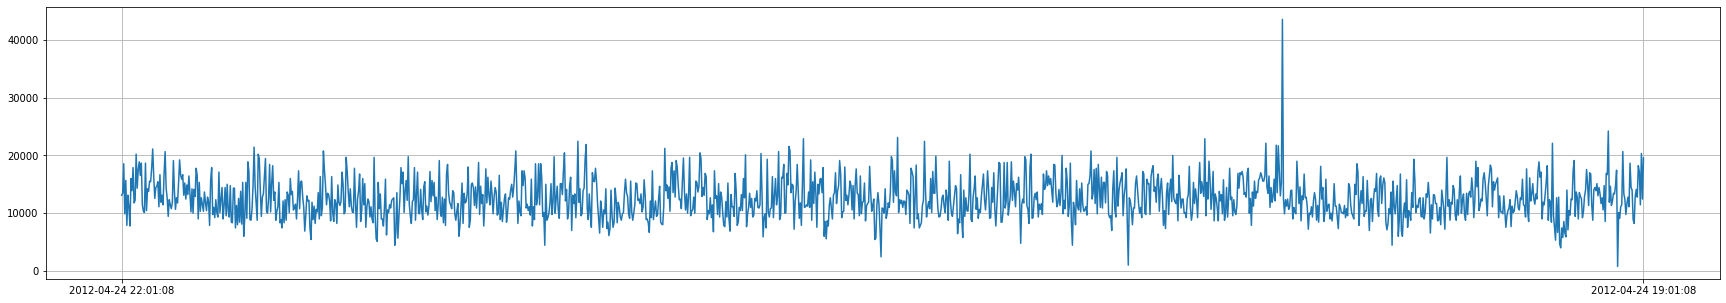

In [0]:
# max값 그래프

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1,1,1)

x1 = datetime_list
y1 = max_list

# x축의 처음과 끝 값 성분만 나오도록 (간격 설정)

ax.set_xticks([0,len(y1)-1])

plt.plot(x1, y1)
plt.grid(True)
plt.show()

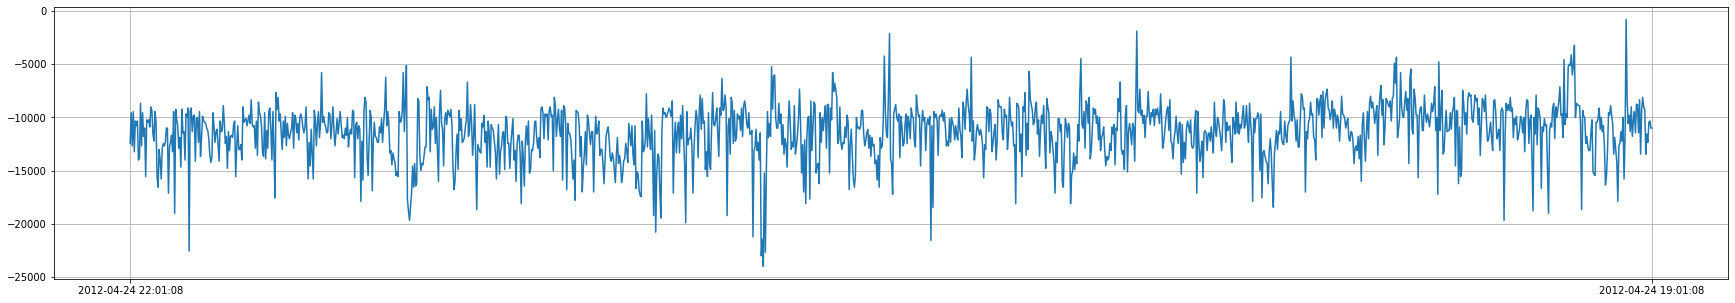

In [0]:
# min값 그래프

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1,1,1)

x2 = datetime_list
y2 = min_list

ax.set_xticks([0,len(y2)-1])

plt.plot(x2, y2)
plt.grid(True)
plt.show()

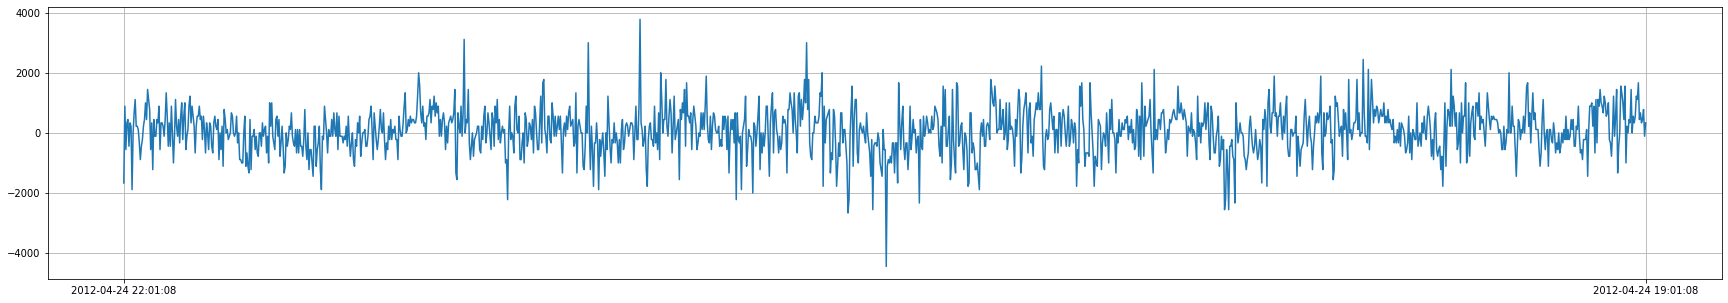

In [0]:
# median값 그래프

fig = plt.figure(figsize=(30,5))
ax = fig.add_subplot(1,1,1)

x3 = datetime_list
y3 = median_list

ax.set_xticks([0,len(y3)-1])

plt.plot(x3, y3)
plt.grid(True)
plt.show()

In [0]:
# 2. He를 numpy array로 읽고, 노출 시간으로 나눠준 후, 태양 내부에만 해당하는 픽셀값 골라서, 그 중 min max 구하기 (30000이상 or -20000이하 값 골라내기 위해)

isize = 1024 # He 파일의 크기
X = np.arange(isize)[:, None]
Y = np.arange(isize)[None :]
XY = np.sqrt((X-isize/2.)**2. + (Y-isize/2.)**2.)

def run(i):
    file = fits.open(file_list[i]) # 메모리 문제 때문에 다시 닫기 위해서 close 기능 있는 astropy로 파일 읽기 (sunpy는 read)
    header = file[0].header
    exptime = header['EXPDUR']
    data = file[0].data / exptime
    file.close()
    rsun = header['CRRADIUS']
    Z = np.where(XY < rsun) # data[Z] = 설정해놓은 rsun에 해당하는 데이터의 np.array를 뽑아냄
    he_max = np.max(data[Z])
    he_min = np.min(data[Z])
    
    # he 데이터는 굳이 median 값 통일 X, 나중에 모델 돌린 후 상황보고 하기

    return (he_max, he_min) # 튜플 형식

# 태양 내부 픽셀값들 중 max, min 값들을 모아놓은 리스트 만들기

max_list = []
min_list = []

for i in range(0,len(file_list)):
    max_list.append(run(i)[0])
    min_list.append(run(i)[1])

# He 데이터의 max값 중 30000 이상과 min값 중 -20000이하인 것은 수동으로 걸러내기 위해 해당 데이터 이름 출력

print('30000이상 목록')

for i in range(0,len(file_list)):
    if max_list[i] >= 30000:
        print(file_list[i])
        
print('-20000이하 목록')
        
for i in range(0,len(file_list)):
    if min_list[i] <= -20000:
        print(file_list[i])

30000이상 목록
/content/drive/My Drive/he_2012_1hr_real//20120129.225906.chp.hsh.fts
-20000이하 목록
/content/drive/My Drive/he_2012_1hr_real//20120503.235908.chp.hsh.fts
/content/drive/My Drive/he_2012_1hr_real//20120810.180008.chp.hsh.fts
/content/drive/My Drive/he_2012_1hr_real//20120829.175912.chp.hsh.fts
/content/drive/My Drive/he_2012_1hr_real//20120902.175912.chp.hsh.fts
/content/drive/My Drive/he_2012_1hr_real//20120902.190109.chp.hsh.fts
/content/drive/My Drive/he_2012_1hr_real//20120902.200108.chp.hsh.fts
/content/drive/My Drive/he_2012_1hr_real//20120902.230108.chp.hsh.fts
/content/drive/My Drive/he_2012_1hr_real//20121011.215907.chp.hsh.fts


In [0]:
# 3. He를 numpy array로 읽고, 노출 시간으로 나눠준 후, 그 중 rsun, data만 구해서 resize (AIA도 2번 과정까지 거친 다음에 실행해야함)

# He fits 파일 있는 폴더 경로 설정 (2번과 수동 과정을 거쳐서 거를거 다 거르고 새로 업데이트 된)

file_list = os.listdir('/content/drive/My Drive/he_2012_1hr_real') 
file_list.sort()
file_list = ['/content/drive/My Drive/he_2012_1hr_real//' + item for item in file_list]

isize = 1024 # He 파일의 크기
X = np.arange(isize)[:, None]
Y = np.arange(isize)[None :]
XY = np.sqrt((X-isize/2.)**2. + (Y-isize/2.)**2.)

def run(i):
    file = fits.open(file_list[i]) # 메모리 문제 때문에 다시 닫기 위해서 close 기능 있는 astropy로 파일 읽기 (sunpy는 read)
    header = file[0].header
    exptime = header['EXPDUR']
    data = file[0].data / exptime
    file.close()
    rsun = header['CRRADIUS']
    Z = np.where(XY < rsun) # data[Z] = 설정해놓은 rsun에 해당하는 데이터의 np.array를 뽑아냄
    data_new = np.log10((data + 3000.).clip(-10000., 10000.)) * (255./2.)

    size = int(1024*412/rsun) # He데이터에서 태양 반지름을 412픽셀로 바꿀 때 1024 이미지가 몇으로 줄어드는지의 정도
    re = resize(data_new,(size,size)) # resize 후의 data - 이때 태양 반지름 412 픽셀

    if size <= 1024: # 1024보다 작으면 0 채워넣기
        if re.shape[0] % 2 == 0: # 짝수면 원래 상태에서 0 채우기
            new_re = np.pad(re, pad_width=int((1024-re.shape[0])/2), mode='constant', constant_values=0)
        else: # 홀수면 가로세로 한 픽셀 줄씩 잘라내서 짝수로 만들고 0 채우기
            re = re[0:re.shape[0]-1,0:re.shape[0]-1]
            new_re = np.pad(re, pad_width=int((1024-re.shape[0])/2), mode='constant', constant_values=0)
            
    return new_re

# resize 시킨 데이터들을 새로운 리스트에 저장

print('Save He data in List')

new_re_list = []

for i in range(0,len(file_list)):
    new_re_list.append(run(i))
    if i % 20 == 0:
      print(i) # 진행상황 보기

# resize된 He의 data 저장

print('Save He data')

for i in range(0,len(file_list)):
    np.save('/content/drive/My Drive/he_2012_data/%s' % file_list[i][42:57], new_re_list[i])
    if i % 20 == 0:
      print(i) # 진행상황 보기

# 태양 반지름 412, 전체 이미지 1024, 1024로 resize 된 He 이미지 저장

path = os.listdir('/content/drive/My Drive/he_2012_data')

def save_image_he(i):
    file = np.load('/content/drive/My Drive/he_2012_data/%s.npy' % file_list[i][42:57])
    imsave('/content/drive/My Drive/he_2012_image/%s.png' % file_list[i][42:57], file.astype(np.uint8))

print('Save He image')

for i in range(0,len(file_list)):
    save_image_he(i)
    if i % 20 == 0:
        print(i) # 진행상황 보기  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
